This program contains functions that produce a random permutation of the numbers 1 through n (where n is specified in the code), conduct four statistical tests to determine whether the permutation is truly random, and plot a bipartite graph and scatterplot representation of the permutation.

First, we will need the "igraph" package:

In [ ]:
library(igraph)

Next, we will define a function called "permute" that produces a random permutation of the numbers 1 through n.

In [2]:
# The permute function takes a positive integer parameter n and generates a permutation of the
# numbers 1 through n via this process:
#
## 1) Begin with the numbers {1,...,n} listed in ascending order
## 2) Pick two indices (numbers 1 through n) uniformly at random
## 3) If the same index was picked twice, do nothing
## 4) If two different indices were picked, swap the numbers at the selected indices
## 5) Repeat this process for 0.5nlog(n) steps
## 6) The end result is an (ostensibly) random permutation
#
# The function also conducts four statistical tests (Footrule, Spearman's rank correlation, 
# Hamming distance, and Kendall's tau) to assess the plausibility of the resulting permutation occurring 
# at random and prints the p values.
permute <- function(n) {
  # pi(i) = i
  pi <- seq(1 : n)
  indices <- seq(1 : n)
  curr_vector <- pi
  # repeat the swap for 0.5nlog(n) times
  for (k in 1 : floor(0.5*n*log(n))) {
  # in the vector, pick 2 indices i, j at random with replacement, if i does not equal to j, 
  # then swap the elements at those indices
    i <- sample(indices, size = 1, replace = TRUE)
    j <- sample(indices, size = 1, replace = TRUE)
    if (i != j) {
      temp <-  curr_vector[i]
      curr_vector[i] <- curr_vector[j]
      curr_vector[j] <- temp
    }
  }
  
# now we get a permutation of size n, but is it a random permutation? Let's test it!
  ro <- 0
  spearman_corr <- 0
  hamm_dis <- 0
  for (i in indices) {
    # calculate the test statistics for Footrule:
    ro <- ro + abs(pi[i] - curr_vector[i])
    # calculate the test statistics for Spearman's rank correlation:
    spearman_corr <- spearman_corr + (pi[i] - curr_vector[i])^2
  # calculate the test statistics for Footrule Hamming distance:
    if (pi[i] != curr_vector[i]) {
      hamm_dis <- hamm_dis + 1
    }
  }

  # test1: Footrule
  AV_ro <- (n^2 - 1) / 3
  VAR_ro <- (n + 1) * (2 * n^2 + 7) / 45
  SD_ro <- sqrt(VAR_ro)
  # get the corresponding z-score
  z_footrule <- (ro - AV_ro)/SD_ro
  # get the corresponding p-value
  p_footrule <- pnorm(z_footrule, mean = 0, sd = 1, lower.tail = TRUE)

  # test2: Spearman's rank correlation
  AV_spearman <- (n^3 - n) / 6
  VAR_spearman <- n^2 * (n - 1) * (n + 1)^2 / 36
  SD_spearman <- sqrt(VAR_spearman)
  # get the corresponding z-score
  z_spearman <- (spearman_corr - AV_spearman)/SD_spearman
  # get the corresponding p-value
  p_spearman <- pnorm(z_spearman, mean = 0, sd = 1, lower.tail = TRUE)
  
  # test3: Footrule Hamming distance
  p_hamm <- ppois(n - hamm_dis, lambda=1)   # lower tail

  # test4: Kendall's tau
  ken_tau <- 0 #test statistic
  for (i in 1:(n-1)) {
    for (j in (i+1):n) { # i<j
      if (which(i==curr_vector) > which(j==curr_vector)) { #position of i > position of j (i.e. there is an inversion)
        ken_tau <- ken_tau + 1
      }
    }
  }
  AV_ken <- choose(n, 2) / 2 #mean
  VAR_ken <- n * (n-1) * (2*n + 5) / 72 #variance
  SD_ken <- sqrt(VAR_ken) #standard deviation
  z_ken <- (ken_tau - AV_ken)/SD_ken #z score
  p_ken <- pnorm(z_ken, mean=0, sd=1, lower.tail=TRUE)
  
  test_results <- c(p_footrule, p_spearman, p_hamm, p_ken)
  test_names <- c("Footrule", "Spearman's rank correlation", "Hamming distance", "Kendall's tau")
  display <- data.frame("Test_names" = test_names, 
                        "p_values" = test_results)
  print(display)
  return(curr_vector)
}

Next, we will define a function "bipartite_permutation" that uses the permute function and produces two graphs:
1) A bipartite graph with an arrow drawn from each index to the value at that index in the resulting permutation

2) A scatterplot with the indices 1 through n on the x-axis and the value at each index on the y-axis

as well as printing the permutation and the results of the four statistical tests.

In [3]:
bipartite_permutation <- function(n) {
  # Generate the bipartite layout for n vertices
  xcoords <- c(rep(-1, n), rep(1, n))
  ycoords <- c()
  for (i in 1:n) {
    ycoords <- c(ycoords, i)
  }
  ycoords <- rep(ycoords, 2)
  coords <- data.frame(xcoords, ycoords)
  mcoords <- as.matrix(coords)
  a <- graph(edges=c(), n=(2*n))
  V(a)$col <- ifelse(V(a)<=n, "SkyBlue2", "yellow")
  
  perm <- permute(n)
  print(perm)
  for (i in 1:n) {
    a <- a + edge(i, perm[i] + n)
  }
  
  #partition the plot viewer to display two graphs at once and plot the bipartite & scatterplot graphs
  par(mfrow=c(1,2), oma = c(0, 0, 2, 0)) #split viewer window so we can display two graphs at once
  plot(a, layout=mcoords, vertex.label=rep(1:n, 2), vertex.color=V(a)$col, vertex.size=16,
       vertex.label.cex=0.8, edge.color="black", edge.arrow.size=0.7,
       main="Bipartite representation")
  plot(seq(1:n), perm, pch = 19, xlab = "indices", ylab = expression(paste("value of ",sigma,"(i)")), 
       main = "Scatterplot representation")
}

Let's try a permutation of the numbers 1 through 10:

                   Test_names   p_values
1                    Footrule 0.06100589
2 Spearman's rank correlation 0.09220924
3            Hamming distance 0.98101184
4               Kendall's tau 0.08985625
 [1]  1  8  2  6  4  9  7  3  5 10


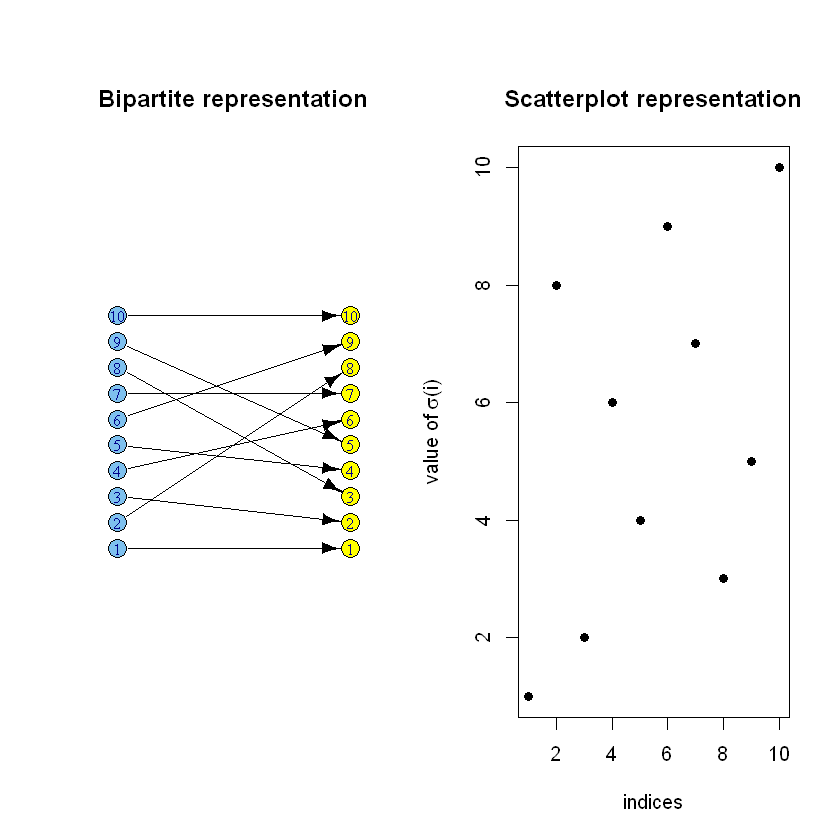

In [4]:
bipartite_permutation(10)